# KABOSU v0.3

## Dataset Used in Kabosu v0.3

Kabosu v0.3 introduces a third diabetes dataset focused on the **Indian population**, incorporating demographic, lifestyle, and clinical variables relevant to diabetes prevalence and risk factors in this context.

The dataset is intended for exploratory and comparative analysis rather than clinical inference.

## Dataset Scope and Features

The dataset includes the following feature groups:

### Demographics
- Age
- Gender
- Urban / rural residence
- Number of pregnancies (applicable to women only)

### Lifestyle Factors
- Physical activity
- Diet type
- Smoking status
- Alcohol intake
- Stress levels

### Medical History
- Family history of diabetes
- Hypertension
- Thyroid conditions
- Regular medical checkups

### Clinical Metrics
- BMI
- Cholesterol levels
- Fasting blood glucose
- Postprandial blood glucose
- HbA1c
- Vitamin D levels
- Additional laboratory measurements

### Target Variable
- Binary diabetes status (Yes / No)

## Data Source and Collection Methodology

The dataset was collected via **web scraping from three publicly available websites**.

This collection method introduces several important considerations:
- potential inconsistencies in variable definitions
- unknown sampling strategies
- possible duplication or aggregation artifacts
- lack of standardized measurement protocols

These limitations are treated as part of the analysis rather than ignored.

## Role of Kabosu v0.3 in the Project

Kabosu v0.3 exists to extend cross-dataset comparison beyond synthetic data by introducing:
- population-specific structure
- culturally and regionally distinct lifestyle variables
- additional sources of distributional shift

As with earlier versions:
- no modeling is performed
- no dataset harmonization is attempted
- the same EDA protocol is applied independently

The objective is to assess whether observed diabetes-related patterns persist across datasets that differ in **population, feature design, and data provenance**.

## Caveats and Interpretation

Because the dataset is web-scraped and population-specific, any observed patterns must be interpreted cautiously.

Apparent signal strength may reflect:
- website-specific reporting biases
- aggregation effects
- cultural or regional encoding choices

Kabosu v0.3 treats these characteristics as signals about data reliability, not as noise to be removed.


# Load Data

In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/diabetes-prediction-in-india-dataset/diabetes_prediction_india (1).csv")

In [2]:
df.shape

(5292, 27)

In [3]:
df.isna().sum()

Age                                     0
Gender                                  0
BMI                                     0
Family_History                          0
Physical_Activity                       0
Diet_Type                               0
Smoking_Status                          0
Alcohol_Intake                       1780
Stress_Level                            0
Hypertension                            0
Cholesterol_Level                       0
Fasting_Blood_Sugar                     0
Postprandial_Blood_Sugar                0
HBA1C                                   0
Heart_Rate                              0
Waist_Hip_Ratio                         0
Urban_Rural                             0
Health_Insurance                        0
Regular_Checkups                        0
Medication_For_Chronic_Conditions       0
Pregnancies                             0
Polycystic_Ovary_Syndrome               0
Glucose_Tolerance_Test_Result           0
Vitamin_D_Level                   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     3512 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

## Handling Alcohol Intake Column

In [5]:
df["Alcohol_Intake"].value_counts(dropna=False)


Alcohol_Intake
NaN         1780
High        1764
Moderate    1748
Name: count, dtype: int64

In [6]:
df["Alcohol_Intake"] = (
    df["Alcohol_Intake"]
    .replace("Non_Drinker", 0)
    .astype(object)
)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     3512 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

## Handling PCOS Column

In [8]:
df["PCOS_applicable"] = df["Gender"] == "Female"


In [9]:
df["PCOS"] = (
    df["Polycystic_Ovary_Syndrome"]
    .where(df["PCOS_applicable"])
)


# Define Categorical, Numerical, Binary and Target Columns

In [10]:
TARGET = "Diabetes_Status"

num_cols = [
    "Age",
    "BMI",
    "Cholesterol_Level",
    "Fasting_Blood_Sugar",
    "Postprandial_Blood_Sugar",
    "HBA1C",
    "Heart_Rate",
    "Waist_Hip_Ratio",
    "Pregnancies",
    "Glucose_Tolerance_Test_Result",
    "Vitamin_D_Level",
    "C_Protein_Level",
    
]

cat_cols = [ 
    "Gender",
    "Physical_Activity",
    "Diet_Type",
    "Smoking_Status",
    "Alcohol_Intake",
    "Stress_Level",
    "Urban_Rural",
    
    
]

binary_cols = [
    "Thyroid_Condition",
    "Medication_For_Chronic_Conditions",
    "Regular_Checkups",
    "Health_Insurance",
    "Hypertension",
    "Family_History",
    "PCOS"
]

# Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 


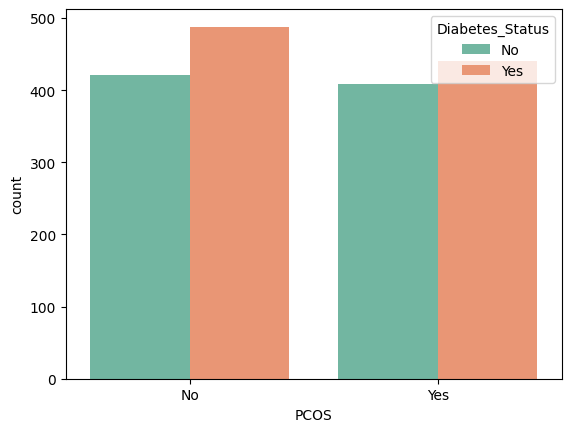

In [12]:
sns.countplot(
    data=df[df["PCOS_applicable"]],
    x="PCOS",
    hue=TARGET,
    palette="Set2"
)

plt.show()


# Target distribution

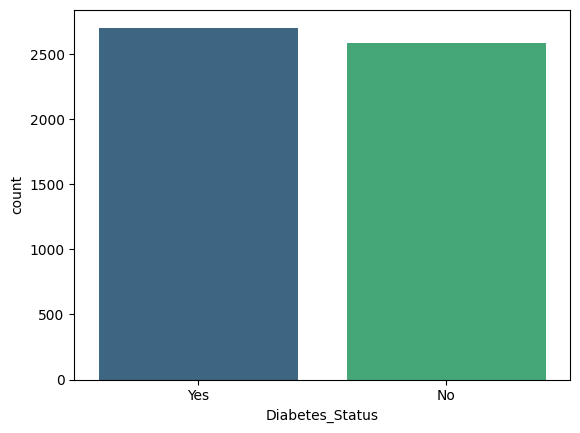

In [13]:
sns.countplot(
    data=df,
    x=TARGET,
    hue=TARGET,
    palette="viridis"
)

plt.show()

# Categorical Columns vs Target

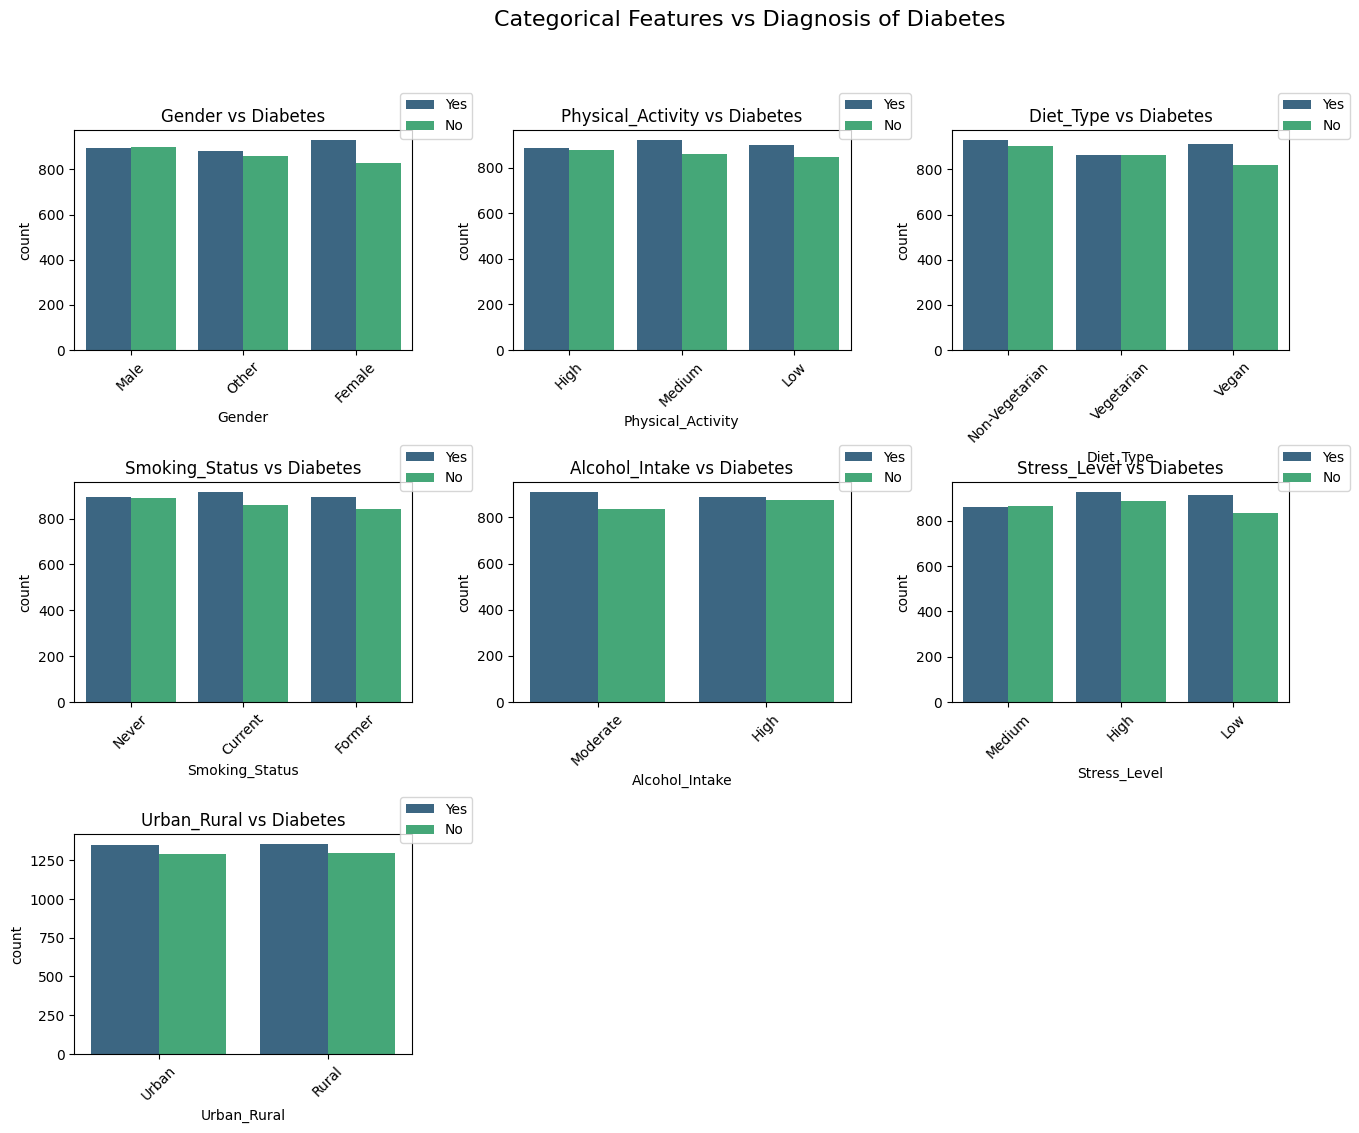

In [14]:
import math

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (6 * n_cols, 4 * n_rows)
)

# Plot graphs in available axes
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=TARGET,
        palette="viridis",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.tick_params(axis="x", rotation=45)
    
    # Adjust legend position for each subplot
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))

# Remove any unused axes
for ax in axes.flatten()[len(cat_cols):]:
    ax.remove()

fig.suptitle("Categorical Features vs Diagnosis of Diabetes", fontsize=16)
plt.subplots_adjust(right=0.8, hspace=0.6, wspace=0.3)  # Adjust layout
plt.show()

# Binary features vs Target

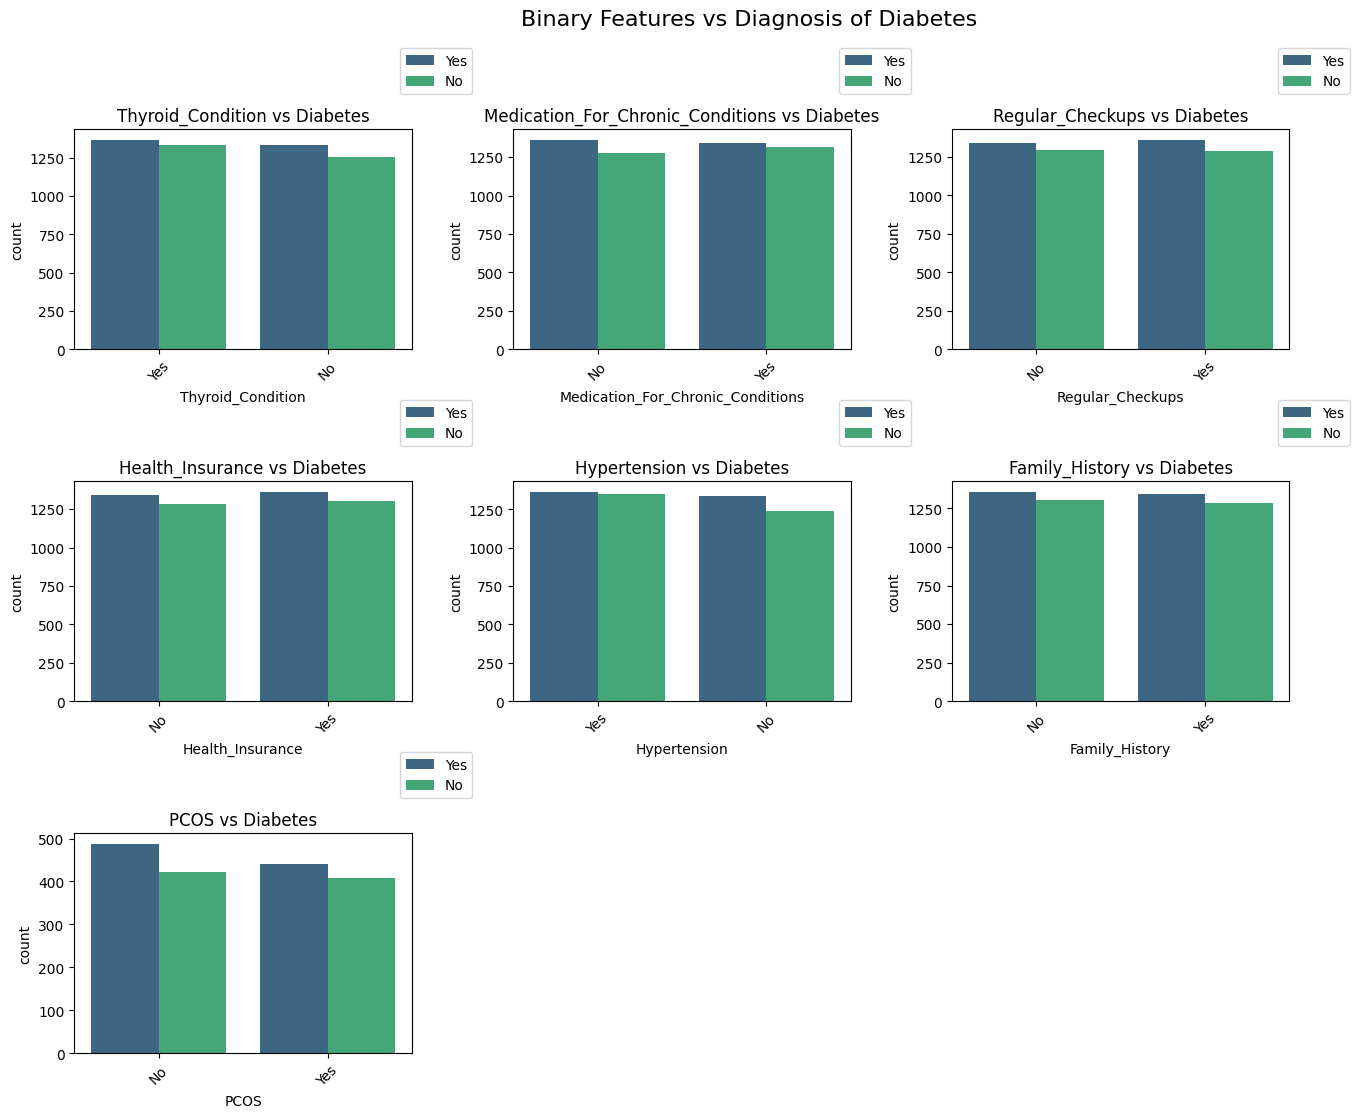

In [15]:
n_cols = 3
n_rows = math.ceil(len(binary_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize = (6 * n_cols, 4 * n_rows)
)


for ax, col in zip(axes.flatten(), binary_cols):
    sns.countplot(
        data=df,
        x=col,
        hue=TARGET,
        palette="viridis",
        ax=ax
    )
    ax.set_title(f"{col} vs Diabetes")
    ax.tick_params(axis="x", rotation=45)
    
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.4))


for ax in axes.flatten()[len(binary_cols):]:
    ax.remove()

fig.suptitle("Binary Features vs Diagnosis of Diabetes", fontsize=16)
plt.subplots_adjust(right=0.8, hspace=0.6, wspace=0.3)  
plt.show()

# Numerical Columns vs Target

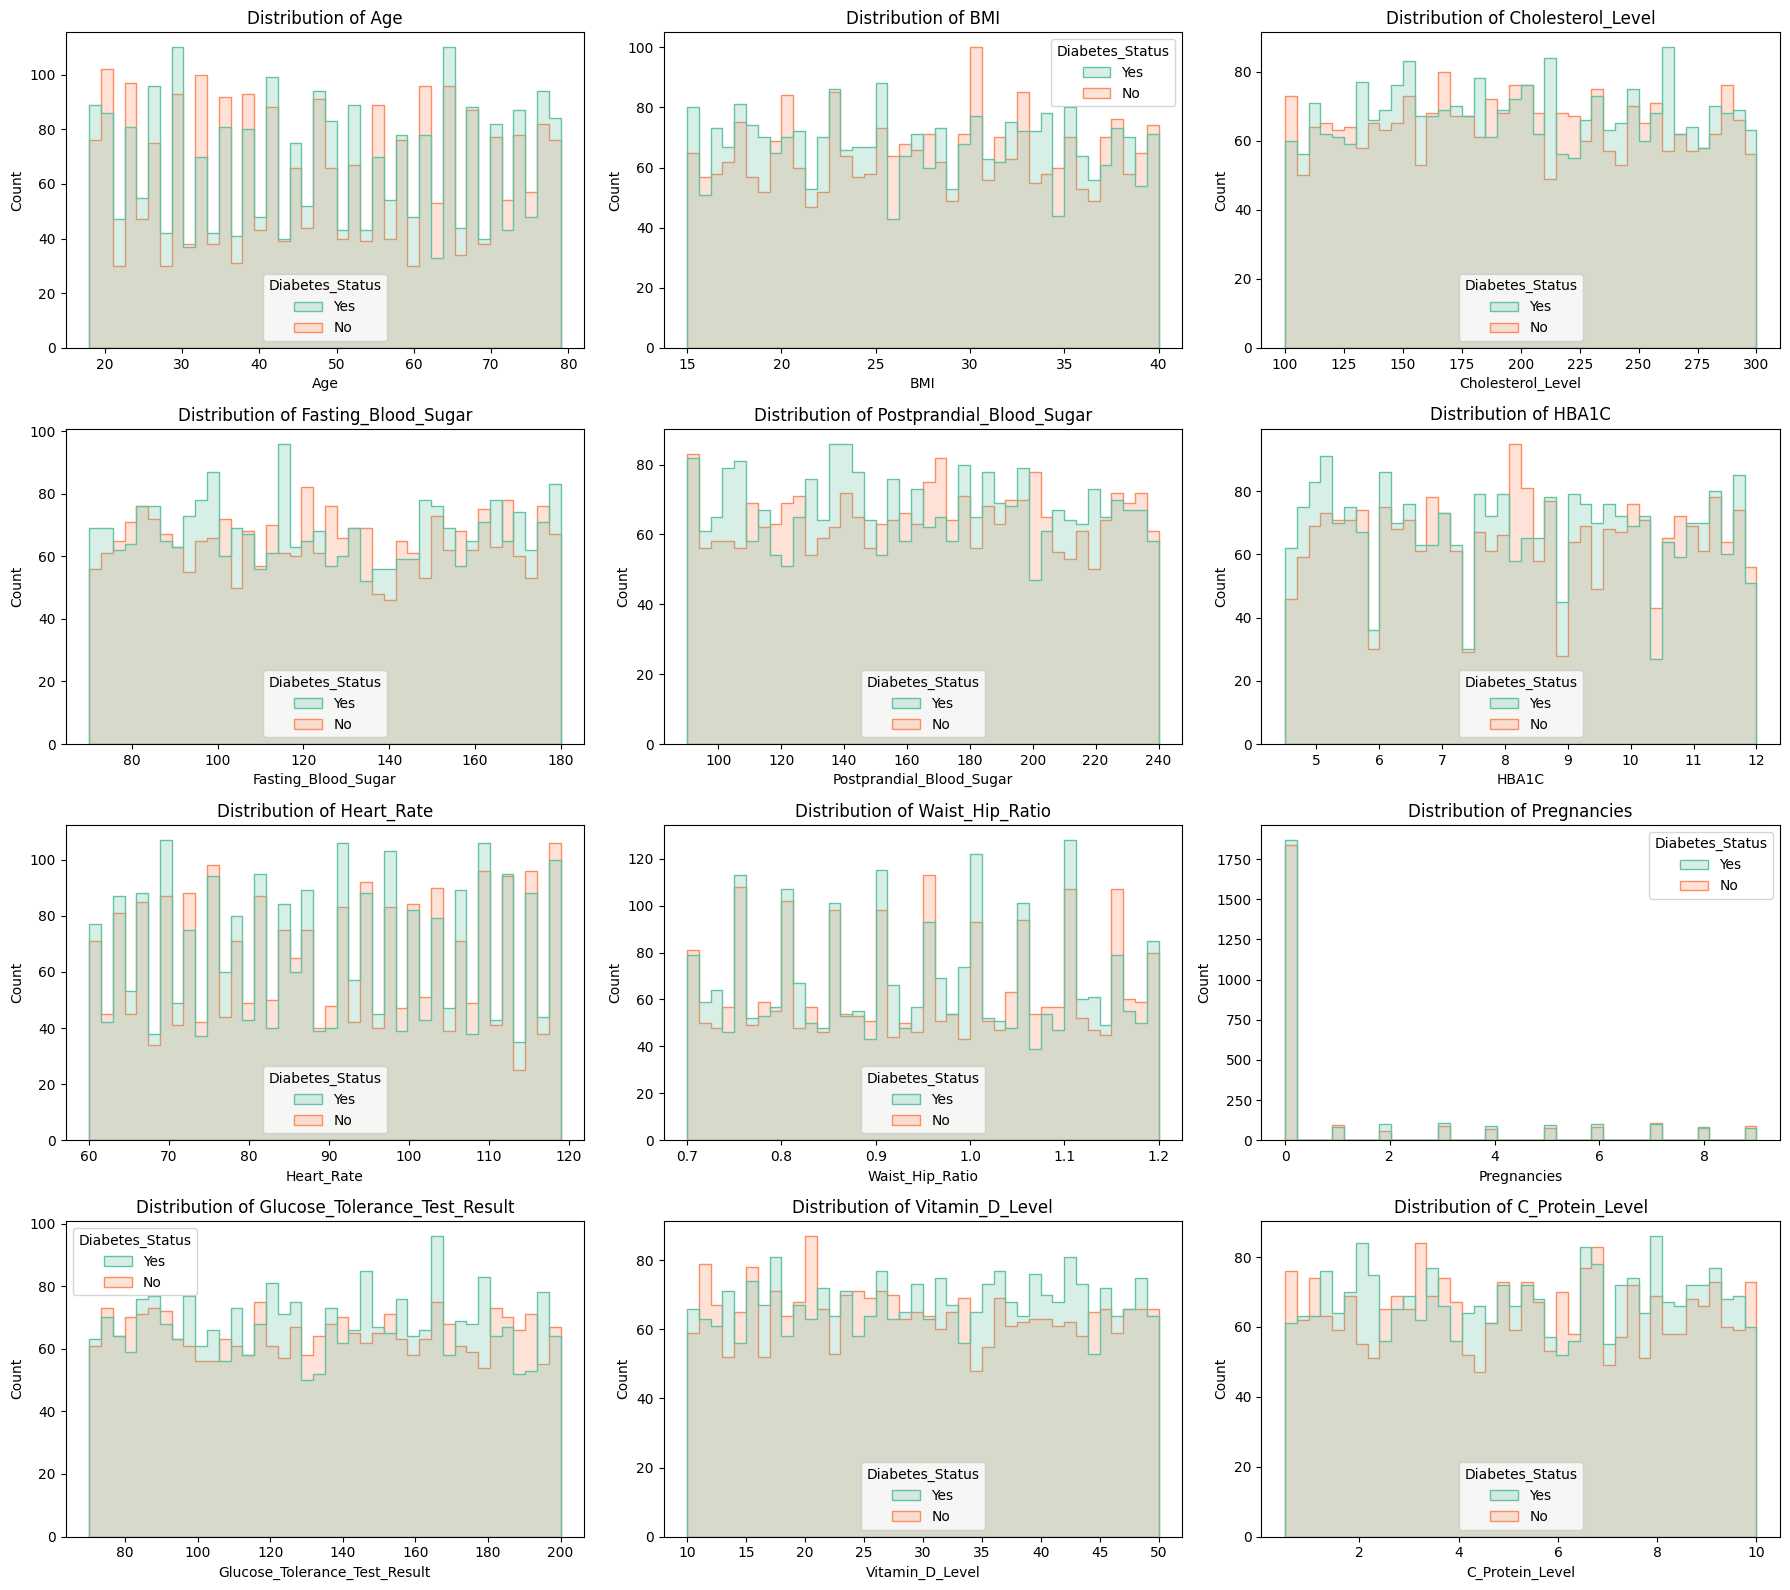

In [16]:
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(6 * n_cols, 4 * n_rows),
    squeeze=False
)

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(
        data=df,
        x=col,
        hue=TARGET,
        bins=40,
        element="step",
        stat="count",
        common_norm=False,
        palette="Set2",
        ax=ax
    )
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)

for ax in axes.flatten()[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

# Dataset Used in Kabosu v0.3

Kabosu v0.3 uses a dataset obtained by web scrapping various open source databases for Indian Patients. 

The dataset is not synthetic.

## Dataset Structure and Scope
The dataset contains a broad range of variables spanning multiple domains:

### Demographic and Socioeconomic Information
### Lifestyle and Behavioral Factors
### Medical History
### Clinical Measurements


Kabosu v0.3 does not attempt to merge or harmonize this dataset with v0.1, or v0.2. Instead, the dataset is analyzed independently using the same EDA framework to assess:

structural differences between datasets
stability of observed patterns
presence of synthetic artifacts
consistency of feature–target relationships


# CITATION

Dataset used for this notebook: https://doi.org/10.34740/kaggle/dsv/10594461